# Model Evaluation

## 어떤 모델이 좋은 모델인가?

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import numpy as np

In [6]:
size_korea = pd.read_csv('../data/size_korea_small.csv')

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# load 
X = size_korea[['키','몸무게','체지방율']].values
y = size_korea.성별.replace({'남':0,'여':1})

#### 층화 추출

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [91]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 30), (569,), (426, 30), (143, 30), (426,), (143,))

In [92]:
from sklearn.svm import SVC
clf = SVC(random_state=0, probability=True)
clf.fit(X_train, y_train)

SVC(probability=True, random_state=0)

## confusion_matrix

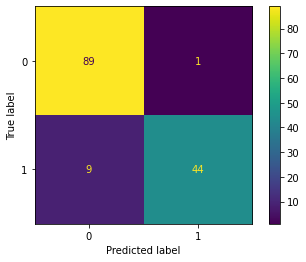

In [93]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [94]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
# sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt="d")

array([[89,  1],
       [ 9, 44]], dtype=int64)

### classification_report

In [95]:
from sklearn.metrics import classification_report
target_names = ['남자(0)', '여자(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       남자(0)       0.91      0.99      0.95        90
       여자(1)       0.98      0.83      0.90        53

    accuracy                           0.93       143
   macro avg       0.94      0.91      0.92       143
weighted avg       0.93      0.93      0.93       143



## 참고: 각 지표의 계산

In [96]:
cm = confusion_matrix(y_test, y_pred)

In [97]:
# accuracy
(cm * np.eye(2)).sum() / cm.sum()

0.9300699300699301

In [98]:
# precision
precision = (cm * np.eye(2)).sum(axis=0) / cm.sum(axis=0)
precision

array([0.90816327, 0.97777778])

In [99]:
# recall
recall = (cm * np.eye(2)).sum(axis=1) / cm.sum(axis=1)
recall

array([0.98888889, 0.83018868])

In [100]:
# f1-score (Harmonic mean)
2 / (1 / precision + 1 / recall)

array([0.94680851, 0.89795918])

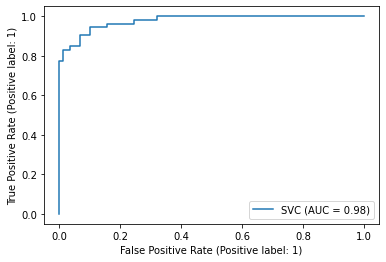

In [101]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)  
plt.show()

In [102]:
# 0일 확률, 1일 확률
y_probas = clf.predict_proba(X_test)
y_probas

array([[3.76796579e-06, 9.99996232e-01],
       [8.85468732e-01, 1.14531268e-01],
       [8.63579569e-01, 1.36420431e-01],
       [8.93773390e-01, 1.06226610e-01],
       [7.90447446e-01, 2.09552554e-01],
       [9.76891709e-01, 2.31082913e-02],
       [9.81544705e-01, 1.84552947e-02],
       [9.78905823e-01, 2.10941772e-02],
       [9.68385682e-01, 3.16143178e-02],
       [2.61464867e-01, 7.38535133e-01],
       [5.48253432e-01, 4.51746568e-01],
       [9.79497614e-01, 2.05023861e-02],
       [9.63363208e-01, 3.66367919e-02],
       [6.04348146e-01, 3.95651854e-01],
       [9.25022243e-01, 7.49777566e-02],
       [4.14099206e-03, 9.95859008e-01],
       [8.52417862e-01, 1.47582138e-01],
       [9.81598347e-01, 1.84016531e-02],
       [9.52343979e-01, 4.76560211e-02],
       [9.61387803e-01, 3.86121966e-02],
       [2.92934659e-01, 7.07065341e-01],
       [1.31688918e-01, 8.68311082e-01],
       [6.44146423e-01, 3.55853577e-01],
       [2.67583452e-06, 9.99997324e-01],
       [8.568061

In [103]:
n = 100
th = np.linspace(0,1,n)
th

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [104]:
y_pred = y_probas[:,1].reshape(-1,1) > th.reshape(1,-1)

In [105]:
confusion_matrix(y_test, y_pred[:,0])

array([[ 0, 90],
       [ 0, 53]], dtype=int64)

In [106]:
cm = confusion_matrix(y_test, y_pred[:,99])
print(cm)
cm[0,0]/cm.sum(axis=1)[0], cm[1,0]/cm.sum(axis=1)[1]

[[90  0]
 [53  0]]


(1.0, 1.0)

In [107]:
tpr = []
fpr = []
for i in range(n):
    cm = confusion_matrix(y_test, y_pred[:,i])
    tpr.append(cm[0,0]/cm.sum(axis=1)[0])
    fpr.append(cm[1,0]/cm.sum(axis=1)[1])

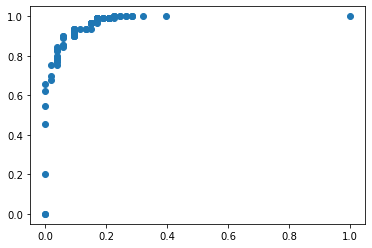

In [108]:
plt.scatter(fpr, tpr)

In [109]:
((clf.predict_proba(X_test)[:,1] >= 0.5) == y_test).mean()

0.9230769230769231

### roc_auc_score 
#### roc 아래의 면적 / 넓으면(1에 가까우면) 좋음

In [110]:
from sklearn.metrics import roc_auc_score
y_score = clf.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_score)

0.9775681341719078

### average_precision_score

In [111]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print(f'Average precision-recall score: {average_precision:0.2f}')

Average precision-recall score: 0.97


### precision_recall_curve
#### th 변화에 따른 두 값의 변화

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.97')

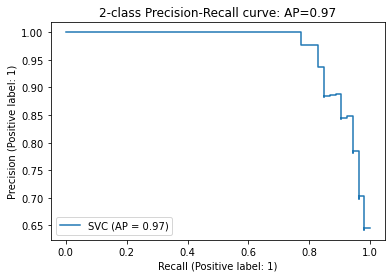

In [112]:
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')

### brier_score_loss
#### mean square error 값과 동일

In [113]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_score)

0.053935561184357717

In [114]:
y_probas = clf.predict_proba(X_test)

### scikitplot - plot_roc
#### 좀더 자세하게 그려줌
- sklearn.metrics.plot_roc_curve

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

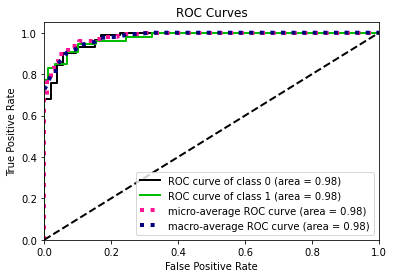

In [115]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)

- sklearn.metrics.plot_precision_recall_curve

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

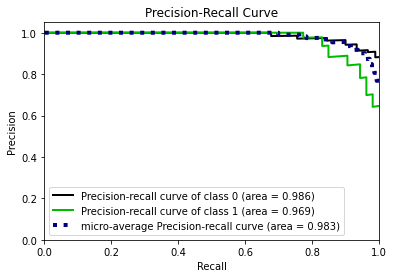

In [116]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

### plot_lift_curve / plot_cumulative_gain
- lift: the ratio between the results obtained with and without the predictive model
- cumulative_gain: percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases

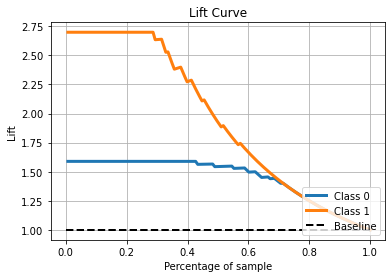

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

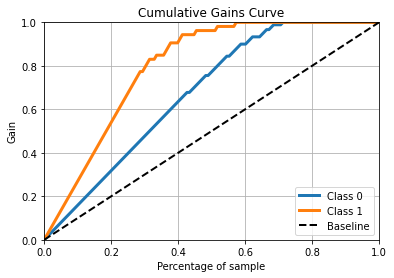

In [117]:
skplt.metrics.plot_lift_curve(y_test, y_probas); plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

### log_loss
- Log Loss is the negative average of the log of corrected predicted probabilities for each instance
- 예측된 확률과 실제값의 차이의 log 값은 1에 가까울 수록 0에 근접

In [118]:
from sklearn.metrics import log_loss
log_loss(y_test, y_probas)

0.17809166281948544

### matthews_corrcoef
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/33f3d62224f97cdef8bc559ee455c3f4815f5788">

- MCC is defined identically to Pearson's phi coefficient
- unbalanced 상황에서 잘 맞음

In [125]:
from sklearn.metrics import matthews_corrcoef
y_pred = clf.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.8518535291230603

### cohen_kappa_score
- Cohen's kappa measures the agreement between two raters
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1a7a8f738ea187a60443bac93cd53b4d9d6b2231">

In [121]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.8453050627434011

### 실습 breast_cancer

In [44]:
# Import the dataset Wisconsin breast cancer dataset from skelarn.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

# Create a DataFrame.
cancer = pd.DataFrame(np.c_[cancer['target'], cancer['data']], 
                      columns = np.append('target', cancer['feature_names']))

# Assign the label 0 to benign samples and 1 to malignant samples
# change the datatype of target from float to integer.
cancer['target'] = cancer['target'].map({0.0: 1, 1.0:0}).astype('int64')
# Check the structure of the dataset
cancer

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [45]:
cancer['target'].value_counts(normalize=True)

0    0.627417
1    0.372583
Name: target, dtype: float64

In [68]:
# Separate the independent variables from the dependent variable.
X = cancer.drop('target', axis = 1)
y = cancer['target']
# Divide the dataset into train (80%) and test (20%).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

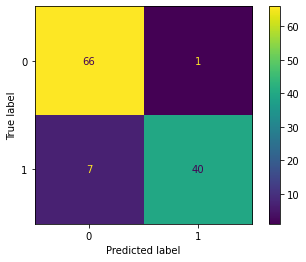

In [69]:
from sklearn.svm import SVC
clf = SVC(random_state=0, probability = True)
clf.fit(X_train, y_train)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

<AxesSubplot:>

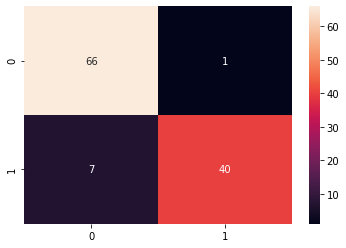

In [70]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [71]:
from sklearn.metrics import classification_report
target_names = ['Negative(0)', 'Positive(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.90      0.99      0.94        67
 Positive(1)       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [72]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
target_names = ['Negative(0)', 'Positive(1)']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.90      0.99      0.94        67
 Positive(1)       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



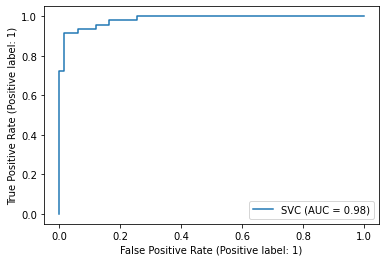

In [73]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test, y_test)  
plt.show()

In [74]:
# 0일 확률, 1일 확률
clf.predict_proba(X_test)

array([[4.47190021e-01, 5.52809979e-01],
       [9.32056319e-01, 6.79436813e-02],
       [9.06245895e-01, 9.37541050e-02],
       [6.26383128e-01, 3.73616872e-01],
       [9.71464229e-01, 2.85357711e-02],
       [9.65569742e-01, 3.44302584e-02],
       [9.73985585e-01, 2.60144153e-02],
       [9.70308447e-01, 2.96915528e-02],
       [9.55855313e-01, 4.41446874e-02],
       [9.76665840e-01, 2.33341602e-02],
       [6.68061451e-01, 3.31938549e-01],
       [6.99722136e-01, 3.00277864e-01],
       [9.73952199e-01, 2.60478011e-02],
       [1.14557359e-01, 8.85442641e-01],
       [6.90059522e-01, 3.09940478e-01],
       [2.88773708e-02, 9.71122629e-01],
       [9.68514766e-01, 3.14852341e-02],
       [1.78786592e-07, 9.99999821e-01],
       [5.02048260e-03, 9.94979517e-01],
       [2.45950428e-07, 9.99999754e-01],
       [1.96470240e-01, 8.03529760e-01],
       [9.92370856e-02, 9.00762914e-01],
       [9.13800043e-01, 8.61999569e-02],
       [9.49010708e-01, 5.09892923e-02],
       [5.386627

In [75]:
clf.predict_proba(X_test).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [76]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: target, Length: 114, dtype: int64

In [77]:
((clf.predict_proba(X_test)[:,1] >= 0.5) == y_test).mean()

0.9385964912280702

In [78]:
from sklearn.metrics import roc_auc_score
y_score = clf.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_score)

0.9844395046046364

In [79]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.98


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.98')

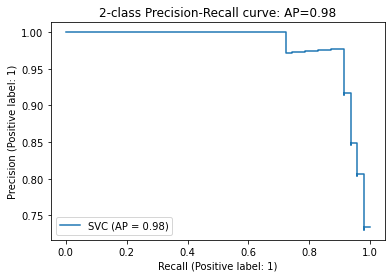

In [80]:
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ' 'AP={0:0.2f}'.format(average_precision))

In [81]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_score)


0.04665283092042529

In [82]:
y_probas = clf.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

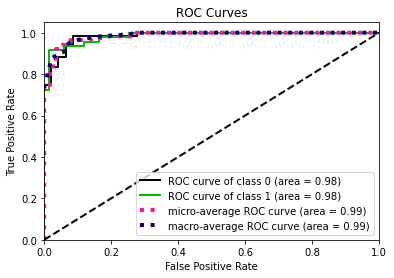

In [83]:
import scikitplot as skplt 
skplt.metrics.plot_roc(y_test, y_probas)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

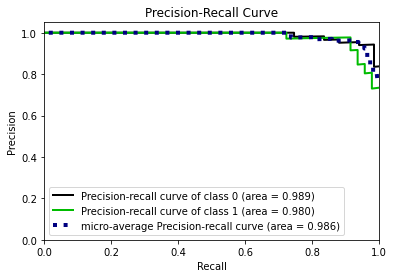

In [84]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

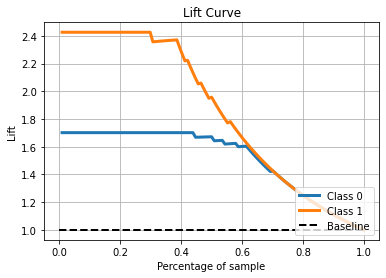

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

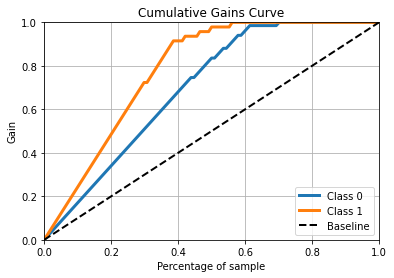

In [85]:
skplt.metrics.plot_lift_curve(y_test, y_probas); plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

KstestResult(statistic=0.05263157894736842, pvalue=0.9976688849230171)

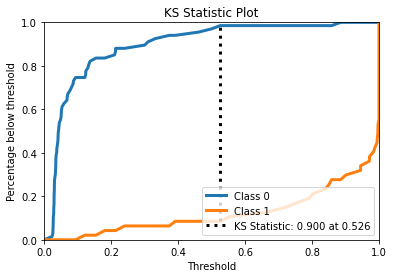

In [86]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)
from scipy.stats import ks_2samp
ks_2samp(y_test, y_pred)

In [87]:
from sklearn.metrics import log_loss
log_loss(y_test, y_probas)


0.16363723956504195

In [88]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


0.8576521296725972

In [89]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.8523794108125606

# End